# Importing the required libraries

In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install tensorflow==2.10.1
!pip install keras

     |████████████████████████████████| 578.1 MB 38 kB/s /s eta 0:00:01 125.3 MB 66.2 MB/s eta 0:00:07                  | 134.2 MB 66.2 MB/s eta 0:00:07��███▊                        | 140.2 MB 66.2 MB/s eta 0:00:079.1 MB/s eta 0:00:04██▍                  | 241.6 MB 109.1 MB/s eta 0:00:04    |██████████████▉                 | 268.9 MB 109.1 MB/s eta 0:00:03| 274.4 MB 109.1 MB/s eta 0:00:03| 285.4 MB 109.1 MB/s eta 0:00:03| 288.5 MB 109.1 MB/s eta 0:00:03[K     |█████████████████▍              | 314.4 MB 109.1 MB/s eta 0:00:03�███████▍            | 349.4 MB 106.5 MB/s eta 0:00:03�███████▌            | 353.1 MB 106.5 MB/s eta 0:00:03��███████████████████▍           | 367.4 MB 106.5 MB/s eta 0:00:02��███████████████████▋           | 372.2 MB 106.5 MB/s eta 0:00:02��███████████████▉        | 431.3 MB 101.8 MB/s eta 0:00:02��███████▎     | 475.7 MB 101.8 MB/s eta 0:00:02��████████     | 488.3 MB 113.1 MB/s eta 0:00:01 MB 113.1 MB/s eta 0:00:01████████████████████████████▏   | 509.6 MB 113.1 

In [3]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

2022-11-19 02:07:12.599965: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-19 02:07:12.639042: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-19 02:07:13.423065: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-19 02:07:13.423244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could 

# Load data

In [4]:
pwd

'/home/wsuser/work'

In [5]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

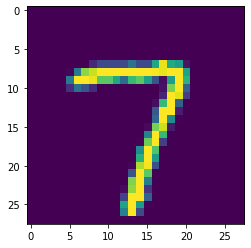

In [8]:
plt.imshow(x_train[5100])     #ploting the index=image

In [9]:
np.argmax(y_train[5100])

0

# Reshaping Dataset

In [10]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [11]:
number_of_classes = 10  #storing the no of classes in a variable

In [12]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [13]:
#create model
model=Sequential ()

2022-11-19 02:07:47.560548: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-19 02:07:47.560634: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [15]:
#flatten the dimension of the image
model.add(Flatten())

In [16]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [17]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [18]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [19]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.2764 - accuracy: 0.9483 - val_loss: 0.0899 - val_accuracy: 0.9737
Epoch 2/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0767 - accuracy: 0.9771 - val_loss: 0.0976 - val_accuracy: 0.9713
Epoch 3/5
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.0709 - val_accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0862 - val_accuracy: 0.9756
Epoch 5/5
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0940 - val_accuracy: 0.9763


In [20]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print(f"Metrics (Test loss & Test Accuracy) : {metrics}")

Metrics (Test loss & Test Accuracy) : [0.09404421597719193, 0.9763000011444092]


# Test The Model

In [21]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 106ms/step
[[9.4508601e-10 2.8311726e-12 2.4172164e-10 4.2019533e-06 5.6716288e-04
  1.6786275e-08 3.0752636e-14 3.9588023e-05 1.5369983e-04 9.9923539e-01]]


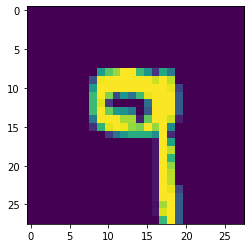

In [22]:
plt.imshow(x_test[6000])

In [23]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [24]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [25]:
# Save the model
model.save('models/mnistCNN.h5')

In [26]:
cd models

/home/wsuser/work/models


In [27]:
!tar -zcvf ImageClassification.tgz mnistCNN.h5

mnistCNN.h5


In [28]:

ls

ImageClassification.tgz  mnistCNN.h5


In [29]:
ls -1

ImageClassification.tgz
mnistCNN.h5


In [30]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 14.8 MB/s eta 0:00:01


In [35]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='itkMi5W_1pw3R_Gyq955TfYrxy6Y_HOUpAh6QFRAUIzr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognitionsystem-donotdelete-pr-tneg1l5yxrqxnd'
object_key = '1.jpg'

streaming_body_5 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


# Cloud deploy

In [36]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"5JUZ--4KgIVofgim1ec577hp3MhT9Dycsjh7f896QK7j"
}
client = APIClient(credentials)
client

In [37]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/f7b6ee51e3f14e7db6bfc853068d39b7:3483adab-92a1-42dc-b6ae-8d4c12331f04::',
      'guid': '3483adab-92a1-42dc-b6ae-8d4c12331f04',
      'name': 'Watson Machine Learning-45',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'ImageClassification',
    'scope': {'bss_account_id': 'f7b6ee51e3f14e7db6bfc853068d39b7'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'a2046f36-f582-4b1b-8354-651cf0fe0b66',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '1f87489525d849abb97b3f077eda066f',
        'api_key': 'sLS0ktLW7Dpl71Qr-3odWRNfqFm7yomKaZxJD1loJhI_',
        'secret_access_key': '1c0f4b73da1059909b9e0f56199aae3a0869006e992e0cdd',
        'service_id': 'ServiceId-47b58c3e-e6ee-4995-8479-1f1a88152184'},
       'editor': {'access_key_id': 'b3b69340cc5a487cb0b5c5f3a76684e1',
        '

In [38]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [39]:
space_uid = guid_from_space_name(client,'ImageClassification')
print("Space UID = " + space_uid)

Space UID = 49f398c3-06a0-41ed-8278-0f606adf8249


In [40]:
client.set.default_space(space_uid)

'SUCCESS'

In [41]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [42]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [43]:
model_details = client.repository.store_model(model='ImageClassification.tgz', meta_props={
    client.repository.ModelMetaNames.NAME:"ImageClassification",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [44]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T02:26:06.532Z',
  'id': 'c14623f7-8296-48eb-9884-abc995061f0c',
  'modified_at': '2022-11-19T02:26:09.640Z',
  'name': 'ImageClassification',
  'owner': 'IBMid-6620040DRO',
  'resource_key': '321a1b82-c53d-4342-bd75-e3479af28ff1',
  'space_id': '49f398c3-06a0-41ed-8278-0f606adf8249'},
 'system': {'warnings': []}}

In [45]:
model_id = client.repository.get_model_id(model_details)
model_id

'c14623f7-8296-48eb-9884-abc995061f0c'

In [46]:
client.repository.download(model_id,'DigitRecognition_model.tar.gz')

Successfully saved model content to file: 'DigitRecognition_model.tar.gz'


'/home/wsuser/work/models/DigitRecognition_model.tar.gz'

In [47]:
ls

DigitRecognition_model.tar.gz  ImageClassification.tgz  mnistCNN.h5


# Test Model

In [48]:
ls

DigitRecognition_model.tar.gz  ImageClassification.tgz  mnistCNN.h5


In [49]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [50]:
model = load_model("mnistCNN.h5")

In [54]:
from tensorflow.keras.utils import load_img
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='itkMi5W_1pw3R_Gyq955TfYrxy6Y_HOUpAh6QFRAUIzr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognitionsystem-donotdelete-pr-tneg1l5yxrqxnd'
object_key = '1.jpg'

streaming_body_9 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [55]:
img = Image.open(streaming_body_9).convert("L")
img = img.resize( (28,28) )

In [56]:
img

In [57]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [58]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 86ms/step
[[5.6444172e-10 9.1569781e-01 7.1692625e-06 5.8071000e-05 2.5059952e-04
  4.1449480e-06 3.8153487e-08 1.0831960e-03 2.3363391e-03 8.0562577e-02]]


In [59]:
print(np.argmax(pred, axis=1)) #printing our Labels

[1]
